In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ast import literal_eval
import seaborn as sns
from scipy import stats



# Heatmap steepness for c vs. m, s close to 0

In [5]:
#data = pd.read_csv("steepness_vs_m_c.csv", converters={'Global quantities': literal_eval})
file = "data/steepness_vs_m_c_parallel.csv"
data = pd.read_csv(file, converters={'Global quantities': literal_eval})
#data = data[data["step"] > 150]
#data.tail(100)
data



,Unnamed: 0,Agents,Global quantities,token account,num trades,num mining,c_tot,m,G,step,"c1, ..., cG",r
0,0,100,"[1000.0, 1000.0, 1000.0, 1000.0]","[100.0, 100.0, 100.0, 100.0]",0,100,0.2,0.2,4,0,[0.10620799 0.05407815 0.02159229 0.01812157],0
1,1,100,"[991.0207990632455, 1005.0078149480939, 1002.1...","[100.19600000000004, 100.00399999999999, 100.0...",0,100,0.2,0.2,4,1,[0.10620799 0.05407815 0.02159229 0.01812157],0
2,2,100,"[1001.6415981264954, 990.4156298961834, 1004.3...","[100.19600000000004, 100.20400000000004, 100.0...",0,100,0.2,0.2,4,2,[0.10620799 0.05407815 0.02159229 0.01812157],0
3,3,100,"[992.4623971897408, 995.8234448442774, 1006.27...","[100.39399999999982, 100.20400000000004, 100.0...",0,100,0.2,0.2,4,3,[0.10620799 0.05407815 0.02159229 0.01812157],0
4,4,100,"[1003.0831962529908, 1001.2312597923715, 993.0...","[100.39399999999982, 100.20400000000004, 100.1...",0,100,0.2,0.2,4,4,[0.10620799 0.05407815 0.02159229 0.01812157],0
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,995,100,"[1016.1969480420229, 987.1791705371656, 972.32...","[499.44, 335.72, 173.13, 386.71]",0,100,1.0,1.0,4,995,[0.40161002 0.23677567 0.07321937 0.28839494],9
249996,996,100,"[968.3579499998541, 1010.8567375427307, 979.64...","[500.32, 335.72, 173.13, 386.83]",0,100,1.0,1.0,4,996,[0.40161002 0.23677567 0.07321937 0.28839494],9
249997,997,100,"[1008.5189519576853, 1034.5343045482957, 986.9...","[500.32, 335.72, 173.13, 387.83]",0,100,1.0,1.0,4,997,[0.40161002 0.23677567 0.07321937 0.28839494],9
249998,998,100,"[1048.6799539155165, 958.2118715538606, 994.29...","[500.32, 336.72, 173.13, 387.83]",0,100,1.0,1.0,4,998,[0.40161002 0.23677567 0.07321937 0.28839494],9


In [6]:

x = np.random.random((10))
y = np.random.random((10)) 
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
p_value

np.float64(0.6430131930079872)

### compute slope of global parameters

In [7]:
# group data by m and c_tot:
grouped_data = data.groupby(['c_tot', 'm'])

tol = 0.05
#compute steepness for each pair of c_tot and m:
def slopes(q_evol):
    #print(q_evol.shape)
    n = q_evol.shape[0]
    G = q_evol.shape[1]
    #print(n, G)

    slope_vals_original = []
    p_vals = []
    slope_vals = []
    variance = []
    for i in range(G):
        slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(0,n), q_evol[:,i])

        #lm = np.polyfit(np.arange(0,n), q_evol[:,i],1)
        #a = np.polyfit(np.arange(0,n), q_evol[:,i],1)[0]
        #print(a)
        #if slope > -tol and slope < tol:
        #    slope = 0.0 #set the slope exactly to 0, because very high fluctuations around steady state
        slope_vals_original.append(slope) 
        p_vals.append(p_value)
        variance.append(std_err)
        #if p_value > tol:
            #slope_vals.append(0.0)
        #else:
        slope_vals.append(slope)


    return slope_vals, slope_vals_original, p_vals, variance

m_vals = []
c_vals = []
min_slope_values = []
max_slope_values = []
min_slope_values_orig = []
max_slope_values_orig = []
mean_p_values = []
max_min_dists = []
mean_variance_vals = []

for idx, df in grouped_data:
    c_vals.append(idx[0])
    m_vals.append(idx[1])
    tmp_slopes = []
    tmp_slopes_original = []
    tmp_p_vals = []
    tmp_max_min = []
    tmp_var = []
    for r, df_sub in df.groupby('r'):
        q_evol = np.array(df_sub["Global quantities"].to_list())
        print(q_evol.shape)
        slope_vals, slope_vals_original, p_vals, variance = slopes(q_evol)
        tmp_slopes.append(slope_vals)
        tmp_slopes_original.append(slope_vals_original)
        tmp_p_vals.append(p_vals)
        tmp_max_min.append(np.max(q_evol)- np.min(q_evol))
        tmp_var.append(variance)

    max_slope_values.append(np.max(tmp_slopes))
    min_slope_values.append(np.min(tmp_slopes))
    max_slope_values_orig.append(np.max(tmp_slopes_original))
    min_slope_values_orig.append(np.min(tmp_slopes_original))
    mean_p_values.append(np.min(tmp_p_vals))
    max_min_dists.append(np.max(tmp_max_min))
    mean_variance_vals.append(np.mean(tmp_var))



(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)


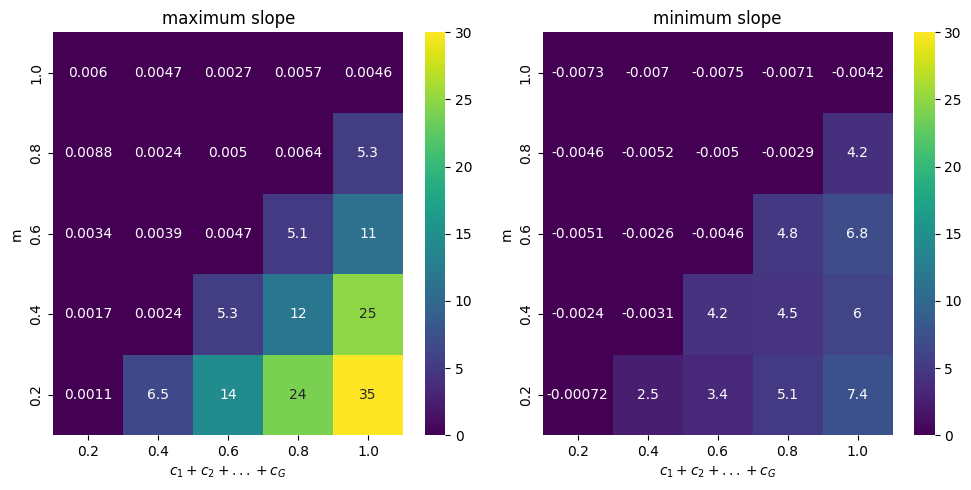

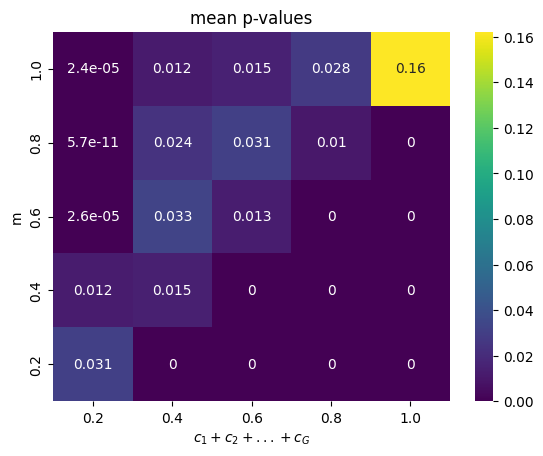

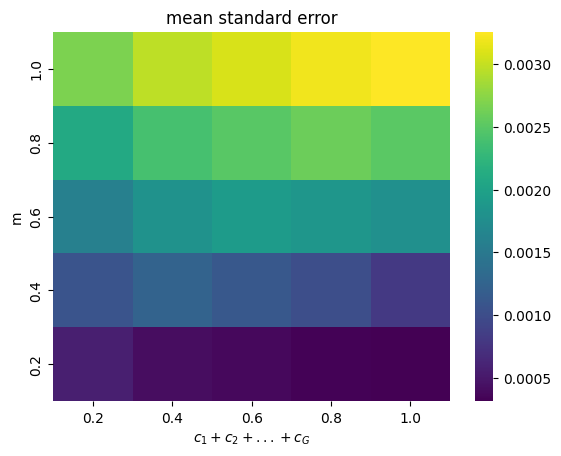

In [8]:
max_slope_data = pd.DataFrame(data={'slope': max_slope_values, 'c':c_vals, 'm':m_vals})
max_matrix_data = max_slope_data.pivot(columns='c', index='m', values='slope')

min_slope_data = pd.DataFrame(data={'slope': min_slope_values, 'c':c_vals, 'm':m_vals})
min_matrix_data = min_slope_data.pivot(columns='c', index='m', values='slope')

p_data = pd.DataFrame(data={'slope': mean_p_values, 'c':c_vals, 'm':m_vals})
p_matrix_data = p_data.pivot(columns='c', index='m', values='slope')

maxdist_data = pd.DataFrame(data={'slope': mean_variance_vals, 'c':c_vals, 'm':m_vals})
maxdist_matrix_data = maxdist_data.pivot(columns='c', index='m', values='slope')




# max_slopes = pd.DataFrame(matrix_data.max())
# max_slopes = max_slopes.T
# max_slopes

#final_data = max_slopes.pivot(index='m', columns='c')

fig, ax = plt.subplots(ncols=2, nrows=1, figsize = (10,5))
sns.heatmap(max_matrix_data, cmap='viridis',  vmin=0, annot=True, ax=ax[0], vmax=30)
ax[0].invert_yaxis()
ax[0].set(title = 'maximum slope',  xlabel = '$c_1 + c_2 + ... + c_G$')
#plt.show()

#fig, ax = plt.subplots()
sns.heatmap(min_matrix_data, cmap='viridis',  vmin=0, annot=True, ax=ax[1], vmax=30)
ax[1].invert_yaxis()
ax[1].set(title = 'minimum slope', xlabel = '$c_1 + c_2 + ... + c_G$')

fig.tight_layout()

plt.show()

fig, ax = plt.subplots()
ax = sns.heatmap(p_matrix_data, cmap='viridis',  vmin=0, annot=True)
ax.invert_yaxis()
ax.set(title = 'mean p-values', xlabel = '$c_1 + c_2 + ... + c_G$')
plt.show()

fig, ax = plt.subplots()
ax = sns.heatmap(maxdist_matrix_data, cmap='viridis')
ax.invert_yaxis()
ax.set(title = 'mean standard error', xlabel = '$c_1 + c_2 + ... + c_G$')
plt.show()

In [9]:
m_vals = []
c_vals = []
r_vals = []
slope_values = []
p_values = []
mean_q_values = []
G = 4

for idx, df in grouped_data:
    for r, df_sub in df.groupby('r'):
        q_evol = np.array(df_sub["Global quantities"].to_list())
        slope_vals, slope_vals_original, p_vals, variance = slopes(q_evol)
        for i in range(G):
            c_vals.append(idx[0])
            m_vals.append(idx[1])
            r_vals.append(r)
            slope_values.append(slope_vals[i])
            p_values.append(p_vals[i])
            mean_q_values.append(np.mean(q_evol[:,i]))


data = {'m': m_vals,
        'c_tot': c_vals,
        'r': r_vals,
        'slope': slope_values,
        'p value': p_values,
        'mean g': mean_q_values
}

slopeDF = pd.DataFrame(data)
slopeDF["c_tot/m"] = np.round(slopeDF["c_tot"] / slopeDF["m"], decimals=1)

### Histogram of slopes for all slopes with p-value > 0.05 in the linear regression

statistics of g values for p-values > 0.05
highest c_tot/m ratio: 1.0
mean slope: -0.00025007413318415845
max slope: 0.005690770051379336
min slope: -0.0048120602609632995
mean: 978.8116433741699
max: 1005.56414901236
min: 951.4771828978751


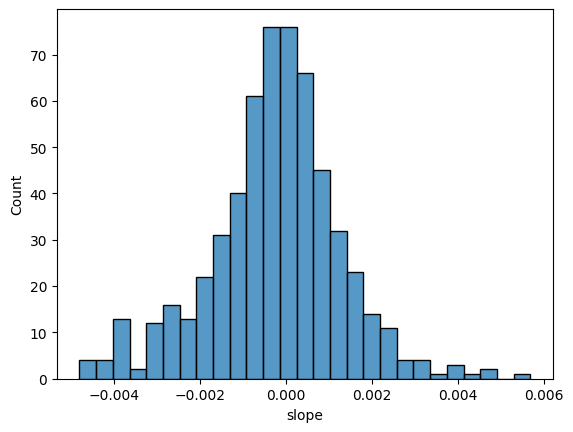

In [10]:
### compute max, min and mean of invalid slopes and range of m:
invalidSlopeDF = slopeDF[slopeDF["p value"] > 0.05]
#sns.boxplot(invalidSlopeDF, x = "c_tot/m", y = "mean g")
sns.histplot(invalidSlopeDF, x="slope")

#highest ration of c_tot / m = 1 -> only where stability cond holds
print("statistics of g values for p-values > 0.05")
print("highest c_tot/m ratio:", max(invalidSlopeDF["c_tot/m"]))
print("mean slope:", np.mean(invalidSlopeDF["slope"]))
print("max slope:", np.max(invalidSlopeDF["slope"]))
print("min slope:", np.min(invalidSlopeDF["slope"]))

print("mean:", np.mean(invalidSlopeDF["mean g"]))
print("max:", np.max(invalidSlopeDF["mean g"]))
print("min:", np.min(invalidSlopeDF["mean g"]))

# set slopes to 0 of invalid p-values
#slopeDF[slopeDF["p value"] > 0.05, "slope"] = 0.0
#round to two digits

### Boxplot of the slope values for each $c_{tot}/m$ ratio

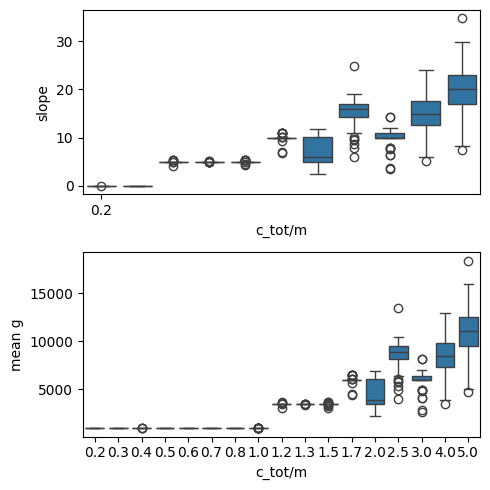

In [11]:
### get all datapoints for which p value < tol
tol = 0.01
fig, ax = plt.subplots(ncols=1, nrows=2, figsize = (5,5))
validSlopeDF = slopeDF[slopeDF["p value"] <= tol]
sns.boxplot(validSlopeDF, x="c_tot/m", y = "slope", ax=ax[0])

#inValidSlopeDF = slopeDF[slopeDF["p value"] > tol]
sns.boxplot(slopeDF, x = "c_tot/m", y = "mean g", ax=ax[1])

ax[0].set(xticks=np.arange(0,5,20))


#meanGData = inValidSlopeDF.groupby(["c_tot", "m"]).mean().reset_index()
#matrix_data = meanGData.pivot(columns='c_tot', index='m', values='mean g')


fig.tight_layout()
# ax[0].invert_yaxis()
# ax[0].set(title = 'maximum slope',  xlabel = '$c_1 + c_2 + ... + c_G$')
# #plt.show()

# Equilibrium level of global parameters in stable systems in dependence of $s$ and $c$

### box plot of mean global parameter values in the long term regime and slopes for different s vs. c,c < m = 1.0


In [15]:
#get data:
#data = pd.read_csv("equilibrium_vs_s_c_parallel.csv", converters={'Global quantities': literal_eval})

#data = pd.read_csv("equilibrium_vs_s_c_parallel_randG_N=10.csv", converters={'Global quantities': literal_eval})

data1 = pd.read_csv("data/equilibrium_vs_s_c_likeInBsp.csv", converters={'Global quantities': literal_eval, 'token account': literal_eval})
data2 = pd.read_csv("data/equilibrium_vs_s_c_s=1.0.csv", converters={'Global quantities': literal_eval, 'token account': literal_eval})
data3 = pd.read_csv("data/equilibrium_vs_s_c_manyS.csv", converters={'Global quantities': literal_eval, 'token account': literal_eval})
data = pd.concat([data1,data2, data3])



data = data[data['step'] > 2900]



#data = pd.read_csv("equilibrium_vs_s_c_parallel_randG_N=10.csv", converters={'Global quantities': literal_eval})





### Probability to mine vs. trade in dependence of $s/G$

ValueError: cannot reindex on an axis with duplicate labels

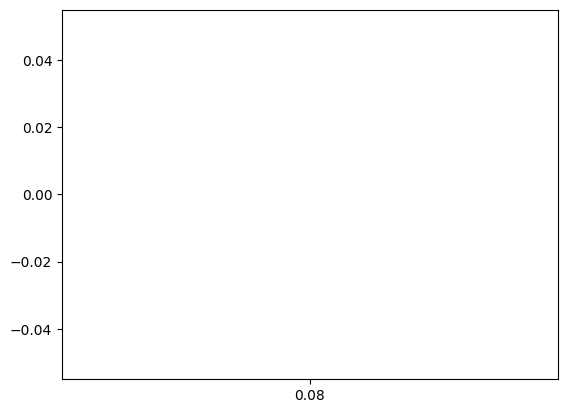

In [23]:

m = 1.0
#c = 0.4

#filtered_data = filtered_data[filtered_data['G'] == 4]
data["p_mine"] =  data["num mining"] / (data["num mining"] + data["num trades"])
data["s/G"] = data["s"] / data["G"] 

data

filtered_data = data[data['m'] == m]
#plt.hist(data["p_mine"])
#plt.hist(data["G"])
subdat = filtered_data #[data["G"] == 5]
#plt.hist(subdat["s/G"], bins = 100)

#boxplot for effective mining amounts
sns.boxplot(subdat, x="s/G", y = "p_mine", saturation = 1) 

In [24]:
c_vals = filtered_data['c1, ..., cG'].to_list()
c_vals = [np.fromstring(s[1:-1], sep=' ') for s in c_vals][0]
print(c_vals[0])

0.03206381


### Mean level of global parameter at equilibrium for different $s/G$ ratios and $c_i$ values

In [25]:
s_vals = []
c_values = []
g_eq_vals = []
g_slope_vals = []
r_vals = []
c_ranges = []
G_vals = []
rep_vals = []
t_eq_vals = []

c_tot_val = []

p_mine_vals = []

#G = 4
tol = 1e-2
#threshold = 100
for idx, df in filtered_data.groupby(['s','c_tot','G']):
    s = idx[0]
    c = idx[1]
    G = idx[2]
    for r, df_sub in df.groupby('r'):
        print(s,r)
        c_vals = df_sub['c1, ..., cG'].to_list()
        c_vals = [np.fromstring(s[1:-1], sep=' ') for s in c_vals][0]
        q_evol = np.array(df_sub["Global quantities"].to_list())
        t_evol = np.array(df_sub["token account"].to_list())
        #normalize q:
        #q_evol = q_evol / threshold
        slope_vals, slope_vals_original, p_vals, variance = slopes(q_evol)

        for i in np.arange(G):
            # get right label
            if c_vals[i]*G  >  s + tol:
                c_ranges.append('$s/G < c_i$')
            elif c_vals[i]*G  <  s - tol:
                c_ranges.append('$s/G > c_i$')
            else: 
                c_ranges.append('$s/G = c_i$')

            s_vals.append(s)
            c_values.append(c_vals[i])
            g_eq_vals.append(np.mean(q_evol[:,i]))
            g_slope_vals.append(slope_vals[i])
            r_vals.append(r)
            G_vals.append(G)
            c_tot_val.append(c)
            rep_vals.append(r)
            t_eq_vals.append(max(0.0, 10.0 - np.mean(t_evol[:,i])))
            p_mine_vals.append(np.mean(df_sub["p_mine"]))

c_values



dictData = {
    "s": s_vals,
    "$c_i$": c_values,
    "g_i": g_eq_vals,
    "G": G_vals,
    "c_tot": c_tot_val,
    "r": rep_vals,
    "t_i": t_eq_vals,
    "p_mine": p_mine_vals
}


df = pd.DataFrame(dictData)

df["$s/G$"] = df['s'] / df['G']


0.4 0
0.4 1
0.4 2
0.4 3
0.4 4
0.4 5
0.4 6
0.4 7
0.4 8
0.4 9
0.4 10
0.4 11
0.4 12
0.4 13
0.4 14
0.4 15
0.4 16
0.4 17
0.4 18
0.4 19
0.4 0
0.4 1
0.4 2
0.4 3
0.4 4
0.4 5
0.4 6
0.4 7
0.4 8
0.4 9
0.4 10
0.4 11
0.4 12
0.4 13
0.4 14
0.4 15
0.4 16
0.4 17
0.4 18
0.4 19
0.4 0
0.4 1
0.4 2
0.4 3
0.4 4
0.4 5
0.4 6
0.4 7
0.4 8
0.4 9
0.4 10
0.4 11
0.4 12
0.4 13
0.4 14
0.4 15
0.4 16
0.4 17
0.4 18
0.4 19
0.6 0
0.6 1
0.6 2
0.6 3
0.6 4
0.6 5
0.6 6
0.6 7
0.6 8
0.6 9
0.6 10
0.6 11
0.6 12
0.6 13
0.6 14
0.6 15
0.6 16
0.6 17
0.6 18
0.6 19
0.6 0
0.6 1
0.6 2
0.6 3
0.6 4
0.6 5
0.6 6
0.6 7
0.6 8
0.6 9
0.6 10
0.6 11
0.6 12
0.6 13
0.6 14
0.6 15
0.6 16
0.6 17
0.6 18
0.6 19
0.6 0
0.6 1
0.6 2
0.6 3
0.6 4
0.6 5
0.6 6
0.6 7
0.6 8
0.6 9
0.6 10
0.6 11
0.6 12
0.6 13
0.6 14
0.6 15
0.6 16
0.6 17
0.6 18
0.6 19
0.8 0
0.8 1
0.8 2
0.8 3
0.8 4
0.8 5
0.8 6
0.8 7
0.8 8
0.8 9
0.8 10
0.8 11
0.8 12
0.8 13
0.8 14
0.8 15
0.8 16
0.8 17
0.8 18
0.8 19
0.8 0
0.8 1
0.8 2
0.8 3
0.8 4
0.8 5
0.8 6
0.8 7
0.8 8
0.8 9
0.8 10
0.8 11
0.8 12
0.8 13
0.

[Text(0.5, 0, '$c_i$'),
 Text(0, 0.5, 'final $g_i$ value'),
 Text(0.5, 1.0, 'mean of each global parameter value over the last 200 iterations')]

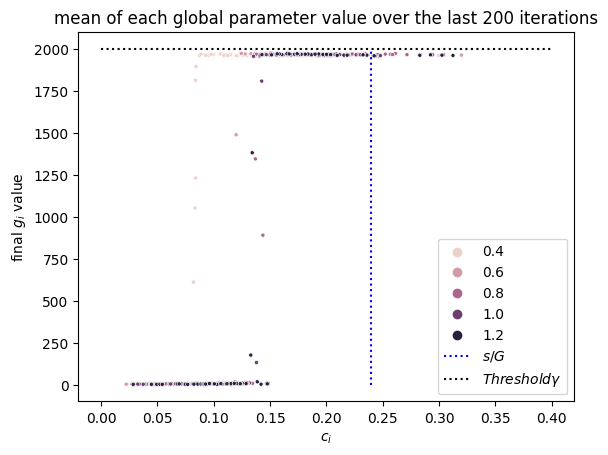

In [ ]:
fig, ax = plt.subplots()


sns.scatterplot(data=df[df['c_tot'] == 0.7], ax=ax, x='$c_i$', y='g_i', alpha=1, hue='s', marker=".")

ax.plot(np.full(1000, s/G), np.linspace(0,2000, 1000), ls="dotted", color = "Blue", label="$s / G$")
ax.plot(np.linspace(0, 0.4, 10), np.full(10, 2000), ls="dotted", color = "Black", label="$Threshold \gamma$")

plt.legend()
ax.set(xlabel='$c_i$', ylabel='final $g_i$ value', title='mean of each global parameter value over the last 200 iterations')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0.5, 0, '$s/G$'),
 Text(0, 0.5, 'probability to mine'),
 Text(0.5, 1.0, 'Probability to mine for nonzero currency needs')]

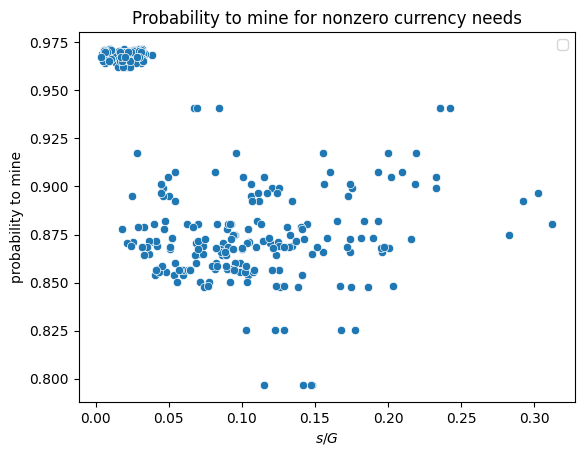

In [ ]:
### avg probability of mining
fig, ax = plt.subplots()
subdat = df[df["$s/G$"] == 0.24]
#subdat = df[df["$s/G$"] < df["$c_i$"]]
subdat = subdat[subdat["t_i"] > 0]
df["p_trade"] = np.full(len(df["p_mine"]),1) - df["p_mine"] 
sns.scatterplot(subdat, x="$c_i$", y = "p_mine", ax=ax) 


#ax.plot(np.full(1000, s/G), np.linspace(0,2000, 1000), ls="dotted", color = "Blue", label="$s / G$")
#ax.plot(np.linspace(0, 0.4, 10), np.full(10, 2000), ls="dotted", color = "Black", label="$Threshold \gamma$")

plt.legend()
#ax.set(xlabel='$s/G$', ylabel="probability to mine", title='Probability to mine for nonzero currency needs')


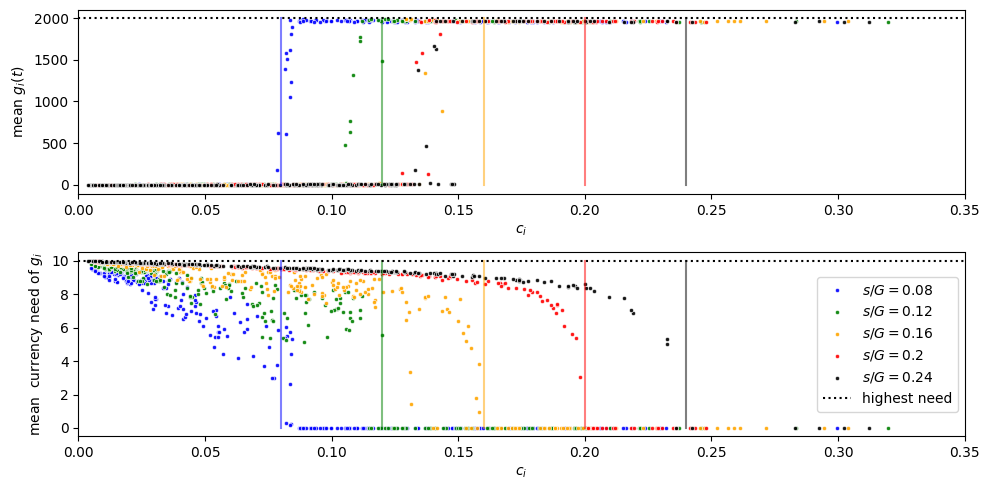

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(10,5))
svals = [1.0, 0.6]
cols = ["Blue", "Green", "Orange", "Red", "Black"]

i = 0
for s, df_s in df.groupby('$s/G$'):
    dfsub = df_s #[df_s['r'] == 1]
    dfsubsub = dfsub[dfsub['c_tot'] == 0.7]
    sns.scatterplot(data=df_s, ax=ax[0], x="$c_i$", y="g_i", alpha=0.9, marker='.', c=cols[i], label=None)#"$s/G=$" + str(s))
    sns.scatterplot(data=df_s, ax=ax[1], x="$c_i$", y="t_i", alpha=0.9, marker='.', c=cols[i], label="$s/G=$" + str(s))

    ax[0].plot(np.full(1000, s), np.linspace(-10,2000, 1000), ls="solid", alpha=0.5, color = cols[i])
    ax[1].plot(np.full(10, s), np.linspace(0,10, 10), ls="solid", alpha=0.5, color = cols[i])

    i += 1


ax[0].plot(np.linspace(0, 0.4, 10), np.full(10, 2000), ls="dotted", color = "Black", label="$\gamma$")
ax[1].plot(np.linspace(0, 0.4, 10), np.full(10, 10), ls="dotted", color = "Black", label="highest need")


#sns.scatterplot(data=df, ax=ax, x="$c_i$", y="g_i", alpha=1, hue="$s/G$")


ax[0].set(xlabel='$c_i$', ylabel='mean $g_i(t)$', xlim=[0,0.35])
ax[1].set(xlabel='$c_i$', ylabel='mean  currency need of $g_i$', xlim=[0,0.35])

plt.legend()
fig.tight_layout()

<>:21: SyntaxWarning: invalid escape sequence '\i'
<>:21: SyntaxWarning: invalid escape sequence '\i'
/var/folders/dc/pggcdl8s6bj387np0g6_cd1h0000gn/T/ipykernel_20081/3302727468.py:21: SyntaxWarning: invalid escape sequence '\i'
  ax.set(xlabel='$c_i$', ylabel='mean  currency need of $g_i$ for $t \in [2900,3000]$')


[Text(0.5, 0, '$c_i$'),
 Text(0, 0.5, 'mean  currency need of $g_i$ for $t \\in [2900,3000]$')]

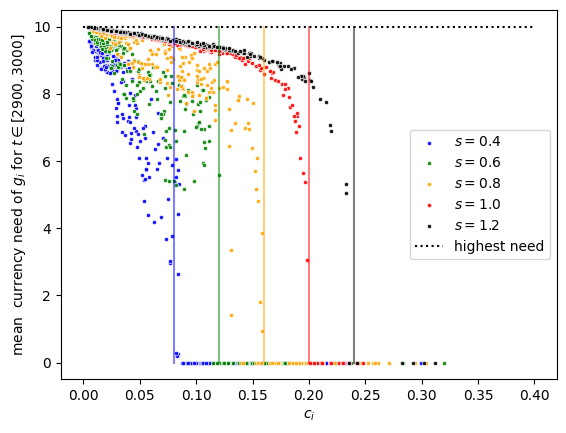

In [ ]:
### mean token accounts:
fig, ax = plt.subplots()
svals = [1.0, 0.6]
cols = ["Blue", "Green", "Orange", "Red", "Black"]

i = 0
for s, df_s in df.groupby('$s/G$'):
    dfsub = df_s[df_s['r'] == 1]
    sns.scatterplot(data=df_s, ax=ax, x="$c_i$", y="t_i", alpha=0.9, marker='.', c=cols[i], label="$s=$" + str(s*5))
    ax.plot(np.full(10, s), np.linspace(0,10, 10), ls="solid", alpha=0.5, color = cols[i])
    i += 1


ax.plot(np.linspace(0, 0.4, 10), np.full(10, 10), ls="dotted", color = "Black", label="highest need")


#sns.scatterplot(data=df, ax=ax, x="$c_i$", y="g_i", alpha=1, hue="$s/G$")


plt.legend()
ax.set(xlabel='$c_i$', ylabel='mean  currency need of $g_i$ for $t \in [2900,3000]$')